In [1]:
"""Programación lineal con Python"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.optimize import linprog

$$\max 3x+4y$$
s.a.
$$\begin{cases}2x+5y&\leqslant 30\\4x+2y&\leqslant 20\end{cases}$$
con $x,y\geqslant 0$

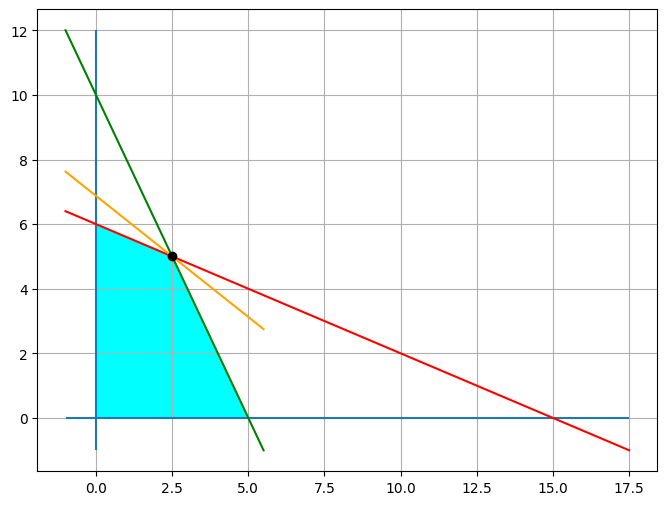

In [13]:
# Método gráfico
fig, ax = plt.subplots(figsize=(8,6))
# Ejes y retícula
ax.grid()
ax.hlines(0,-1,17.5)
ax.vlines(0,-1,12)
# Restricciones
ax.plot(np.linspace(-1,17.5,2),6-0.4*np.linspace(-1,17.5,2),color='r')
ax.plot(np.linspace(-1,5.5,2),10-2*np.linspace(-1,5.5,2),color='g')
# Feasibles
feasibles = Polygon([[0,0],[0,6],[2.5,5],[5,0]],color='cyan')
ax.add_patch(feasibles)
# Función objetivo
ax.plot(np.linspace(-1,5.5,2),6.875-0.75*np.linspace(-1,5.5,2),color='orange')
ax.plot(2.5,5,"o",color="black")

In [14]:
# Método simplex
obj = np.array([3,4])
A=np.array([[2,5],[4,2]])
b=np.array([30,20])

sol=linprog(-obj,A,b)

In [15]:
print(sol)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27.5
              x: [ 2.500e+00  5.000e+00]
            nit: 2
          lower:  residual: [ 2.500e+00  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-6.250e-01 -4.375e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [16]:
import pandas as pd
dic = {'Unidad':['espadachines','arqueros','jinetes'],
       'Comida':[60,80,140],
       'Madera':[20,10,0],
       'Oro':[0,40,100],
       'Potencia':[70,95,230]
       }

In [24]:
!python3 -m pip install ortools

In [27]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver('MAximiza army power',pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

In [30]:
e=solver.IntVar(0,solver.infinity(),'espadachines')
a=solver.IntVar(0,solver.infinity(),'arqueros')
j=solver.IntVar(0,solver.infinity(),'jinetes')

solver.Add(e*60+a*80+j*140<=1200)
solver.Add(e*20+a*10<=800)
solver.Add(a*40+j*100<=600)

solver.Maximize(e*70+a*95+j*230)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print(f"""Óptimo = {solver.Objective().Value()}\n\nEspadachines = {e.solution_value()}\n\nArqueros = {a.solution_value()}\n\nJinetes = {j.solution_value()}""")
else:
    print('fallo')

Óptimo = 1800.0

Espadachines = 6.0000000000000036

Arqueros = 0.0

Jinetes = 5.999999999999999
